# Import and prepare the pics.

In [1]:
import os
import zipfile

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

from PIL import Image
from IPython.display import display


In [2]:
train_zip_file = '/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip'
test_zip_file = '/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip'

kaggle_working_dir = '/kaggle/working/'
kaggle_working_train_dir = 'train'
kaggle_working_test_dir =  'test'

def unzip_dataset(path_file, w_dir_name, path_working_dir):
    if not os.path.isdir(w_dir_name):
        with zipfile.ZipFile(path_file, 'r') as zip_ref:
          zip_ref.extractall(path_working_dir)

unzip_dataset(train_zip_file, kaggle_working_train_dir, kaggle_working_dir)
unzip_dataset(test_zip_file, kaggle_working_test_dir, kaggle_working_dir)

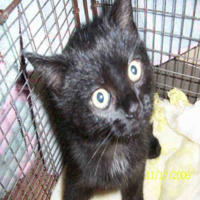

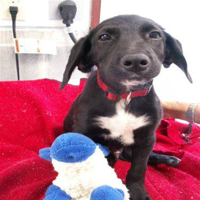

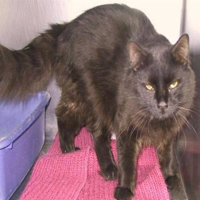

In [3]:
training_pics = os.listdir(kaggle_working_train_dir)

# Check first 3 images in training data
pics_to_display=[]
for i in range(3):
    got = os.path.join(kaggle_working_train_dir, training_pics[i])
    pics_to_display.append(Image.open(got).resize((200,200)))

display(*pics_to_display)


In [4]:
def get_dir_photos(dir_photos):
    
    X_data ,Y_data = [], []
    training_pics = os.listdir(dir_photos)
    for pic in training_pics:
        pic  = os.path.join(dir_photos, pic)
        # you may want to normalize it .. but i was out of ram, and it's just a sample
        # arr = np.array(Image.open(pic).resize((200,200)))/255
        arr = np.array(Image.open(pic).resize((200,200)))
        X_data.append(arr)
        
        if 'dog' in pic.lower():
            Y_data.append(1)
        else:
            Y_data.append(0)

    return np.array(X_data), np.array(Y_data)


In [5]:
X_train ,Y_train = get_dir_photos(kaggle_working_train_dir)

X_train.shape, Y_train.shape

((25000, 200, 200, 3), (25000,))

### **check a random photo from training & test dirs**

image  dog.4311.jpg in training pics


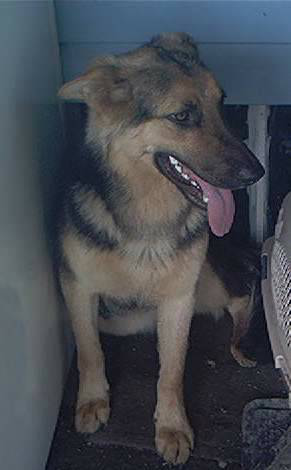

In [6]:
to_show = np.random.choice(training_pics)
print("image ", to_show, 'in training pics')
Image.open(os.path.join(kaggle_working_train_dir, to_show))

image  3006.jpg in testing pics


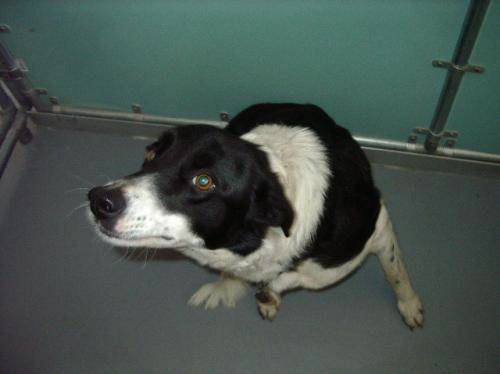

In [7]:
to_show = np.random.choice(os.listdir(kaggle_working_test_dir))
print("image ", to_show, 'in testing pics')
Image.open(os.path.join(kaggle_working_test_dir, to_show))

## Splitting training data and train the model.

In [8]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.05, random_state=42)

In [9]:
print(X_train.shape,Y_train.shape)
print(X_valid.shape,Y_valid.shape)

(23750, 200, 200, 3) (23750,)
(1250, 200, 200, 3) (1250,)


In [10]:
model_cnn = keras.Sequential([

        layers.Conv2D(filters=32, kernel_size=3,input_shape=[200, 200,3],
                      activation='relu'),
        layers.MaxPool2D(),
    
        layers.Conv2D(filters=64, kernel_size=3,
                      activation='relu'),
        layers.MaxPool2D(),
        
        layers.Conv2D(filters=64, kernel_size=3,
                      activation='relu'),
        layers.MaxPool2D(),
        
        
        layers.Conv2D(filters=64, kernel_size=3,
                      activation='relu'),
        layers.MaxPool2D(),
    
        layers.Conv2D(filters=64, kernel_size=3,
                      activation='relu'),
        layers.MaxPool2D(),
        
        layers.Flatten(),
        layers.Dense(100, activation='relu'),
        layers.Dropout(0.3),

        layers.BatchNormalization(),
    
    
        layers.Dense(1, activation='sigmoid'),
])



early_stopping=EarlyStopping(min_delta=0.0001,
                    restore_best_weights=1,
                    patience=20,
                   )

model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
                loss='binary_crossentropy',
                metrics=['binary_accuracy']
                 );


2022-10-06 06:53:45.213382: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-06 06:53:45.315890: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-06 06:53:45.316679: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-06 06:53:45.319502: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [11]:
history_cnn = model_cnn.fit(X_train, Y_train,
                            batch_size=64,
                            epochs=100,
                            verbose=True,
                            validation_data=(X_valid, Y_valid),
                            callbacks=[early_stopping],
                            );

2022-10-06 06:53:47.682983: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2850000000 exceeds 10% of free system memory.
2022-10-06 06:53:51.403494: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2850000000 exceeds 10% of free system memory.
2022-10-06 06:53:53.647032: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-10-06 06:53:55.280731: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


372/372 [==============================] - 22s 37ms/step - loss: 0.7130 - binary_accuracy: 0.5660 - val_loss: 0.6994 - val_binary_accuracy: 0.5360
Epoch 2/100
372/372 [==============================] - 13s 35ms/step - loss: 0.6540 - binary_accuracy: 0.6126 - val_loss: 0.6683 - val_binary_accuracy: 0.5976
Epoch 3/100
372/372 [==============================] - 13s 35ms/step - loss: 0.6648 - binary_accuracy: 0.5944 - val_loss: 0.7020 - val_binary_accuracy: 0.5728
Epoch 4/100
372/372 [==============================] - 13s 35ms/step - loss: 0.6206 - binary_accuracy: 0.6529 - val_loss: 2.2232 - val_binary_accuracy: 0.5136
Epoch 5/100
372/372 [==============================] - 13s 35ms/step - loss: 0.6952 - binary_accuracy: 0.5315 - val_loss: 0.9555 - val_binary_accuracy: 0.5240
Epoch 6/100
372/372 [==============================] - 13s 35ms/step - loss: 0.6811 - binary_accuracy: 0.5571 - val_loss: 0.6766 - val_binary_accuracy: 0.5864
Epoch 7/100
372/372 [==============================] - 13s

## Saving model progress

In [12]:
model_cnn.save('cats_dogs_classifier')

2022-10-06 07:03:17.269487: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [13]:
test_list_pics = os.listdir(kaggle_working_test_dir)

In [14]:
def get_one_picture(picture_path):
    p = Image.open(picture_path).resize((200,200))
    return np.array(p).reshape(1, 200,200, 3)


def print_predicted_type(picture_to_predict, print_pred=False):
    predicted = model_cnn.predict(get_one_picture(picture_to_predict))
    if print_pred:
        if predicted >= 0.5:
            print("Dog")
        else:
            print("Cat")
    return predicted

## **Test Predictions**

picture to predict :  test/5378.jpg
Dog
with score =  [0.6527043]


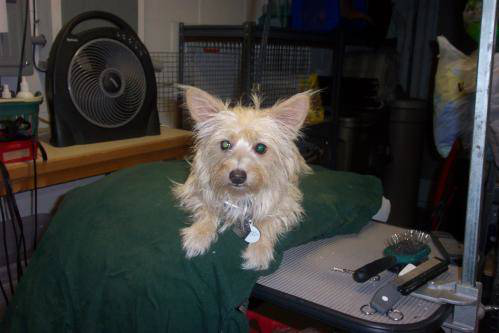

In [15]:
random_pic = np.random.choice(test_list_pics)

pic_path_to_predict = os.path.join(kaggle_working_test_dir, random_pic)

print('picture to predict : ', pic_path_to_predict)

print("with score = ", print_predicted_type(pic_path_to_predict, True)[0])

Image.open(pic_path_to_predict)

# **Create The prediction for every Pic.**

In [16]:
test_images_ids = set()
for image_to_predict in test_list_pics:
    test_images_ids.add(int(image_to_predict.replace('.jpg','')))

In [17]:
predicted_array = np.zeros((len(test_images_ids), 2))

In [18]:
predicted_array[:,0] = np.array(list(test_images_ids))

In [19]:
for i in range(predicted_array.shape[0]): 
    pic_path_to_predict = os.path.join(kaggle_working_test_dir, str(i+1) + '.jpg')
    predicted_array[i, 1] = print_predicted_type(pic_path_to_predict)


## **Create A DataFrame for test pics predictions.**

In [20]:
df_to_submission = pd.DataFrame({
    "id": pd.Series(predicted_array[:,0], dtype=np.int16),
    "label": predicted_array[:, 1]
}) 

In [21]:
df_to_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      12500 non-null  int16  
 1   label   12500 non-null  float64
dtypes: float64(1), int16(1)
memory usage: 122.2 KB


In [22]:
df_to_submission

,id,label
0,1,9.798874e-01
1,2,9.998425e-01
2,3,9.982290e-01
3,4,9.969739e-01
4,5,1.004061e-03
...,...,...
12495,12496,7.057404e-07
12496,12497,1.577608e-02
12497,12498,9.899046e-01
12498,12499,9.986882e-01


**Saving The output**

In [23]:
df_to_submission.to_csv('submission.csv', index=False)

# **Show The losses and Accuracy Curves**

In [24]:
history_score = pd.DataFrame(history_cnn.history)

In [25]:
history_score.head()

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.712977,0.566021,0.699420,0.5360
1,0.654023,0.612589,0.668278,0.5976
2,0.664794,0.594358,0.702040,0.5728
3,0.620561,0.652926,2.223221,0.5136
4,0.695237,0.531537,0.955479,0.5240


<AxesSubplot:>

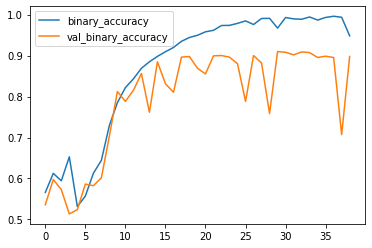

In [26]:
history_score.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

<AxesSubplot:>

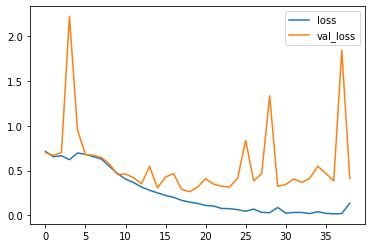

In [27]:
history_score.loc[:, ['loss', 'val_loss']].plot()